<a href="https://colab.research.google.com/github/myconcordia/COMP478/blob/main/Tutorial3COMP478.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os

print(cv2.__version__, cv2.__spec__)
#print(cv2.getBuildInformation())

4.6.0 ModuleSpec(name='cv2', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7f7ccf0c1e50>, origin='/usr/local/lib/python3.8/dist-packages/cv2/__init__.py', submodule_search_locations=['/usr/local/lib/python3.8/dist-packages/cv2'])


**Mount Google Drive: First mount and authenticate yourself**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
#Second change your current folder to point working folder My Drive
os.chdir("/content/drive/My Drive/")
os.listdir()

**Image Operations: Blending**

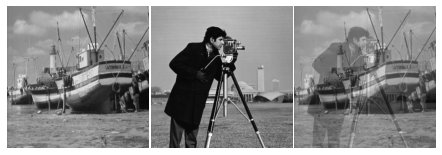

In [4]:
I1 = cv2.imread('./images/boat.png')
I2 = cv2.imread('./images/cameraman.png')

# # resize image
# resized = cv2.resize(I, (256, 256), interpolation = cv2.INTER_AREA)
# #print('Resized Dimensions : ',resized.shape)
# cv2.imwrite('gato.png', resized)

#J = cv2.add(I1, I2)
#J = cv2.subtract(I1, I2)
#J = cv2.absdiff(I1, I2)
#J = cv2.multiply(I1, I2)
#J = cv2.divide(I1, I2)
alpha = 0.3
J = cv2.addWeighted(I1,0.7,I2,alpha,0)
#J = cv2.bitwise_and(I1, I2)
#J = cv2.bitwise_or(I1, I2)

plt.figure('Image blending')
plt.subplot(131), plt.imshow(I1), plt.axis('off')
plt.subplot(132), plt.imshow(I2), plt.axis('off')
plt.subplot(133), plt.imshow(J), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

**Spatial Transformations**

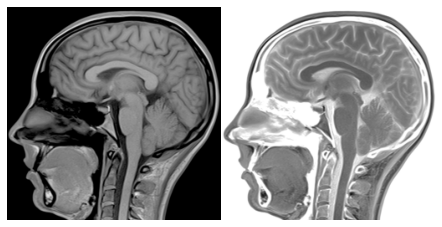

In [5]:
I = cv2.imread('./images/head.png') 

#Image negatives s=T(r)=L-1-r
# Subtract the img from max value(calculated from dtype)
I_neg = 255 - I
plt.figure('Image Negative')
plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(I_neg), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

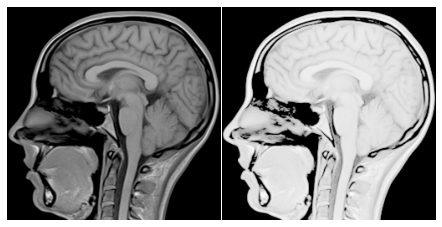

In [6]:
# Log transformation. 
c = 255/(np.log(1 + np.max(I))) 
I_log = c * np.log(1 + I) 
# Specify the data type. 
I_log = np.array(I_log, dtype = np.uint8) 
plt.figure('Log transformation')
plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(I_log), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

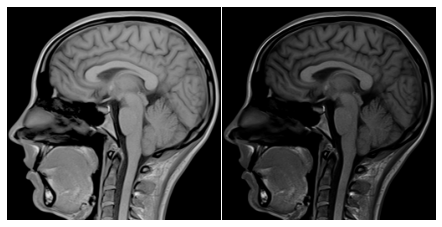

In [7]:
#Power-Law (Gamma) Transformation
# Trying 4 gamma values. 
#gamma in [0.1, 0.5, 1.2, 2.2]: 
# Apply gamma correction. 
gamma = 2.2
I_gamma = np.array(255*(I / 255) ** gamma, dtype = 'uint8') 
plt.figure('Power-Law (Gamma) Transformation')
plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(I_gamma), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

**Piece-wise Linear Transformations**

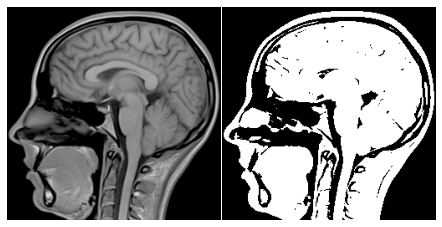

In [8]:
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
    
# Define parameters. 
r1 = 70
s1 = 0
r2 = 140
s2 = 255
# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 
# Apply contrast stretching. 
I_contrast_stretched = pixelVal_vec(I, r1, s1, r2, s2) 
plt.figure('Piece-wise Linear Transformation')
plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(I_contrast_stretched), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

**Image Histogram**

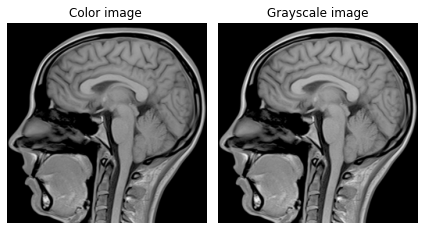

In [9]:
##OpenCV follows BGR order, while plt follows RGB order
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
J = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.figure('Color and grascale images')
plt.subplot(121), plt.imshow(I), plt.title('Color image '), 
plt.axis('off')
plt.subplot(122), plt.imshow(J, cmap ='gray'), plt.title('Grayscale image'), 
plt.axis('off')
plt.tight_layout()
plt.show()

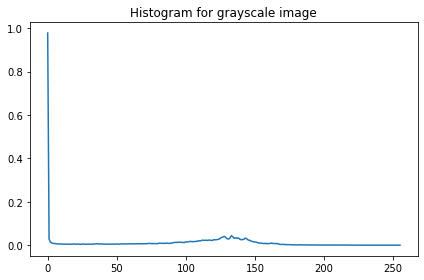

In [10]:
#Image histogram
h = cv2.calcHist([J],[0],None,[256],[0,256])
h = cv2.normalize(h, h).flatten()
#h = cv2.normalize(h, h, 0, 1, cv2.NORM_MINMAX)
plt.plot(h)
plt.title('Histogram for grayscale image')
plt.tight_layout()
plt.show()

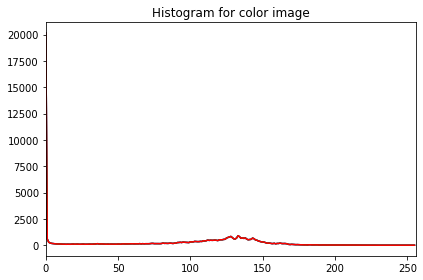

In [11]:
#color histogram
color = ('b','g','r')
for channel,col in enumerate(color):
    h = cv2.calcHist([I],[channel],None,[256],[0,256])
    #h = cv2.normalize(h, h).flatten()
    plt.plot(h,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color image')
plt.tight_layout()
plt.show()

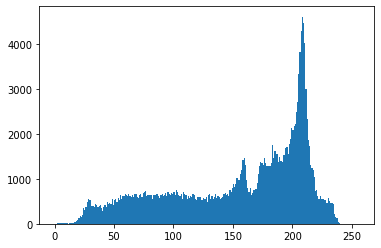

In [12]:
# alternative way to compute histogram of an image
plt.figure('Image histogram2')
I = cv2.imread('./images/chat.png')
plt.hist(I.ravel(),256,[0,256])
#plt.hist(I.ravel(),256,[0,256], density=True)
plt.show()

**Histogram equalization**

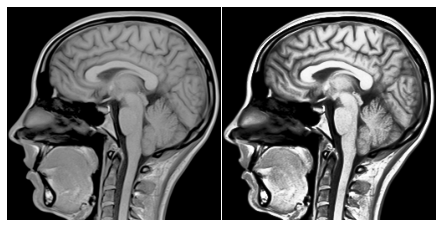

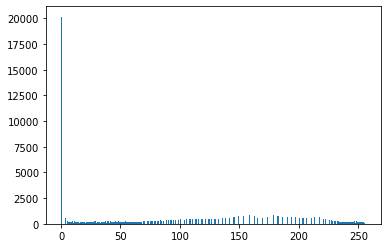

In [13]:
J_equalized = cv2.equalizeHist(J)
plt.subplot(121), plt.imshow(J, cmap ='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(J_equalized, cmap ='gray'), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

plt.hist(J_equalized.ravel(),256,[0,256])
plt.show()

**Image noise model**

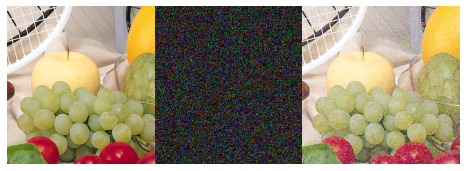

In [14]:
I = cv2.imread('./images/fruits.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
# Generate Gaussian noise
noise = np.random.normal(0,1,I.size)
noise = noise.reshape(I.shape[0],I.shape[1],I.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
I_noisy = cv2.add(I,noise)
plt.figure('Image noise')
plt.subplot(131), plt.imshow(I), plt.axis('off')
plt.subplot(132), plt.imshow(noise), plt.axis('off')
plt.subplot(133), plt.imshow(I_noisy), plt.axis('off')
plt.tight_layout(pad=-1)
plt.show()

# plt.figure('Image noisy')
# Ic = cv2.hconcat([I,noise,I_noisy])
# plt.imshow(Ic), plt.axis('off')
# plt.show()